<a href="https://colab.research.google.com/github/jason96819/Book_Rating_Regressor/blob/main/Book_data_Training_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('./drive/MyDrive/data/book/book_rating_predict_data.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,User-ID,Age,Country,City,Main-Title,Sub-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,USER_00000,20,canada,sackville,Road Taken,No_SUB,Rona Jaffe,2000-2009,Mira,8
1,USER_00000,20,canada,sackville,Macbeth,New Penguin Shakespeare,William Shakespeare,1950-1999,Penguin Books,8
2,USER_00000,20,canada,sackville,Waverley,Penguin English Library,Walter Scott,1950-1999,Penguin Books,0
3,USER_00000,20,canada,sackville,Mother Earth Father Sky,No_SUB,Sue Harrison,1950-1999,Avon,0
4,USER_00000,20,canada,sackville,She Who Remembers,No_SUB,Linda Lay Shuler,1950-1999,Signet Book,8
...,...,...,...,...,...,...,...,...,...,...
825051,USER_92096,30,usa,minneapolis,Healing Words,The Power of Prayer and the Practice of Medicine,Larry Dossey,1950-1999,Harpercollins,0
825052,USER_92097,30,usa,temple,The Salmon of Doubt,Hitchhiking the Galaxy One Last Time,DOUGLAS ADAMS,2000-2009,Harmony,0
825053,USER_92098,40,canada,ottawa,Harry Potter and the Prisoner of Azkaban,Book 3,J. K. Rowling,2000-2009,Thorndike Press,0
825054,USER_92099,40,usa,maple grove,Heartbreak Hill,Anatomy of a Ryder Cup,Tim Rosaforte,1950-1999,St Martins Pr,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825056 entries, 0 to 825055
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              825056 non-null  object
 1   Age                  825056 non-null  int64 
 2   Country              825056 non-null  object
 3   City                 825056 non-null  object
 4   Main-Title           824952 non-null  object
 5   Sub-Title            825056 non-null  object
 6   Book-Author          825056 non-null  object
 7   Year-Of-Publication  825056 non-null  object
 8   Publisher            825056 non-null  object
 9   Book-Rating          825056 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 62.9+ MB


In [ ]:
y = df['Book-Rating']
X = df.drop(columns = 'Book-Rating')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for column in X.columns:
    encoded_col = le.fit_transform(X[column])
    X[column] = encoded_col
X

,User-ID,Age,Country,City,Main-Title,Sub-Title,Book-Author,Year-Of-Publication,Publisher
0,0,2,53,10135,112343,58125,75101,4,8697
1,0,2,53,10135,85010,57737,88878,3,10066
2,0,2,53,10135,172234,60125,87379,3,10066
3,0,2,53,10135,92153,58125,81192,3,1122
4,0,2,53,10135,118708,58125,52489,3,12057
...,...,...,...,...,...,...,...,...,...
825051,79302,3,294,7448,60498,78151,50380,3,5893
825052,79303,3,294,11683,153781,47235,16358,4,5824
825053,79304,4,53,8775,59900,30432,35633,4,13099
825054,79305,4,294,7005,60785,26996,84377,3,12413


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825056 entries, 0 to 825055
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   User-ID              825056 non-null  int64
 1   Age                  825056 non-null  int64
 2   Country              825056 non-null  int64
 3   City                 825056 non-null  int64
 4   Main-Title           825056 non-null  int64
 5   Sub-Title            825056 non-null  int64
 6   Book-Author          825056 non-null  int64
 7   Year-Of-Publication  825056 non-null  int64
 8   Publisher            825056 non-null  int64
dtypes: int64(9)
memory usage: 56.7 MB


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=177)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((660044, 9), (165012, 9), (660044,), (165012,))

In [ ]:
def generate_data():
    df = pd.read_csv('./drive/MyDrive/data/book/book_rating_predict_data.csv')
    df = df.drop(columns = 'Unnamed: 0')

    y = df['Book-Rating']
    X = df.drop(columns = 'Book-Rating')

    le = LabelEncoder()

    for column in X.columns:
        encoded_col = le.fit_transform(X[column])
        X[column] = encoded_col

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=177)

    return X, y, X_train, X_test, y_train, y_test

In [ ]:
X, y, X_train, X_test, y_train, y_test = generate_data()

# 1. 다중 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
def adj_r2_score(y_true, y_pred, p=df.shape[1]):
    return 1-(1-r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - p - 1)

In [ ]:
# 선형 회귀 모델 생성 및 학습
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = LR_model.predict(X_test)

# 모델 평가
LR_mse = mean_squared_error(y_test, y_pred)
LR_rmse = mean_squared_error(y_test, y_pred, squared=False)
LR_r2 = r2_score(y_test, y_pred)
LR_adj_r2 = adj_r2_score(y_test, y_pred)

print("Mean Squared Error:", LR_mse)
print("Root Mean Squared Error:", LR_rmse)
print("R-squared:", LR_r2)
print("Adj-R-squared:", LR_adj_r2)

Mean Squared Error: 14.59962064710695
Root Mean Squared Error: 3.8209449939912705
R-squared: 0.0043373882392313545
Adj-R-squared: 0.004277045416353875


In [ ]:
# 기울기(coefficient)
coefficients = LR_model.coef_
print("Coefficients:", coefficients)

# 편향(intercept)
intercept = LR_model.intercept_
print("Intercept:", intercept)

Coefficients: [-1.75893553e-06 -1.07285104e-01 -1.12967340e-03 -9.70419582e-06
  7.20117180e-08 -2.33026848e-06 -3.73282127e-07  3.42233887e-01
 -1.75996952e-06]
Intercept: 2.5233832098236033


## 계층별 교차 검증

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
S_kfold_list = [5, 10, 15, 20]

for i in S_kfold_list:
    S_kfold = StratifiedKFold(n_splits=i, shuffle=True, random_state=177)

    rmse_list = []
    n_iter =0

    for train_index, test_index in S_kfold.split(X, y):
        x_train, x_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        LR_model.fit(x_train, y_train)
        pred = LR_model.predict(x_test)
        n_iter += 1

        rmse = mean_squared_error(y_test, pred, squared=False)

        train_size = x_train.shape[0]
        test_size = x_test.shape[0]

        print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
            .format(n_iter, rmse, train_size, test_size))
        print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
        rmse_list.append(rmse)

    print()
    print("="*50)
    print(f'#kfold가{i}일 때 평균 검증 정확도:', np.mean(rmse_list))
    print("="*50)


#1 교차 검증 정확도 : 3.825202619575687,  학습 데이터 크기 : 660044,  검증 데이터 크기 : 165012
#1 검증 세트 인덱스 : [    17     19     21 ... 825042 825051 825052]

#2 교차 검증 정확도 : 3.8257394734683468,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#2 검증 세트 인덱스 : [     1      3      4 ... 825024 825039 825054]

#3 교차 검증 정확도 : 3.825022424275812,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#3 검증 세트 인덱스 : [    20     22     31 ... 825048 825049 825053]

#4 교차 검증 정확도 : 3.8252405045580606,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#4 검증 세트 인덱스 : [     6      7     12 ... 825043 825050 825055]

#5 교차 검증 정확도 : 3.8256459160259455,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#5 검증 세트 인덱스 : [     0      2      5 ... 825044 825045 825046]

#kfold가5일 때 평균 검증 정확도: 3.82537018758077

#1 교차 검증 정확도 : 3.826010892037432,  학습 데이터 크기 : 742550,  검증 데이터 크기 : 82506
#1 검증 세트 인덱스 : [    17     19     21 ... 825025 825026 825038]

#2 교차 검증 정확도 : 3.8244975159734715,  학습 데이터 크기 : 742550,  검증 데이터 크기 : 82506
#2 검증 세트 인덱스 : [    27     34     66 ... 825042

# 2. 의사 결정 나무

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X, y, X_train, X_test, y_train, y_test = generate_data()

In [ ]:
# 의사결정나무 회귀 모델 생성 및 학습
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = DT_model.predict(X_test)

# 모델 평가
DT_mse = mean_squared_error(y_test, y_pred)
DT_rmse = mean_squared_error(y_test, y_pred, squared=False)
DT_r2 = r2_score(y_test, y_pred)
DT_adj_r2 = adj_r2_score(y_test, y_pred)

print("Mean Squared Error:", DT_mse)
print("Root Mean Squared Error:", DT_rmse)
print("R-squared:", DT_r2)
print("Adj-R-squared:", DT_adj_r2)

Mean Squared Error: 21.59053735485904
Root Mean Squared Error: 4.646561885400757
R-squared: -0.47242803985576165
Adj-R-squared: -0.4725172773779496


In [ ]:
S_kfold_list = [5, 10, 15, 20]

for i in S_kfold_list:
    S_kfold = StratifiedKFold(n_splits=i, shuffle=True, random_state=177)

    rmse_list = []
    n_iter =0

    for train_index, test_index in S_kfold.split(X, y):
        x_train, x_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        DT_model.fit(x_train, y_train)
        pred = DT_model.predict(x_test)
        n_iter += 1

        rmse = mean_squared_error(y_test, pred, squared=False)

        train_size = x_train.shape[0]
        test_size = x_test.shape[0]

        print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
            .format(n_iter, rmse, train_size, test_size))
        print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
        rmse_list.append(rmse)

    print()
    print("="*50)
    print(f'#kfold가{i}일 때 평균 검증 정확도:', np.mean(rmse_list))
    print("="*50)


#1 교차 검증 정확도 : 4.677127574974101,  학습 데이터 크기 : 660044,  검증 데이터 크기 : 165012
#1 검증 세트 인덱스 : [    17     19     21 ... 825042 825051 825052]

#2 교차 검증 정확도 : 4.658359085913677,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#2 검증 세트 인덱스 : [     1      3      4 ... 825024 825039 825054]

#3 교차 검증 정확도 : 4.698916459255454,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#3 검증 세트 인덱스 : [    20     22     31 ... 825048 825049 825053]

#4 교차 검증 정확도 : 4.674582332823366,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#4 검증 세트 인덱스 : [     6      7     12 ... 825043 825050 825055]

#5 교차 검증 정확도 : 4.668700936119827,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#5 검증 세트 인덱스 : [     0      2      5 ... 825044 825045 825046]

#kfold가5일 때 평균 검증 정확도: 4.675537277817285

#1 교차 검증 정확도 : 4.6507958459164,  학습 데이터 크기 : 742550,  검증 데이터 크기 : 82506
#1 검증 세트 인덱스 : [    17     19     21 ... 825025 825026 825038]

#2 교차 검증 정확도 : 4.649897712407179,  학습 데이터 크기 : 742550,  검증 데이터 크기 : 82506
#2 검증 세트 인덱스 : [    27     34     66 ... 825042 8250

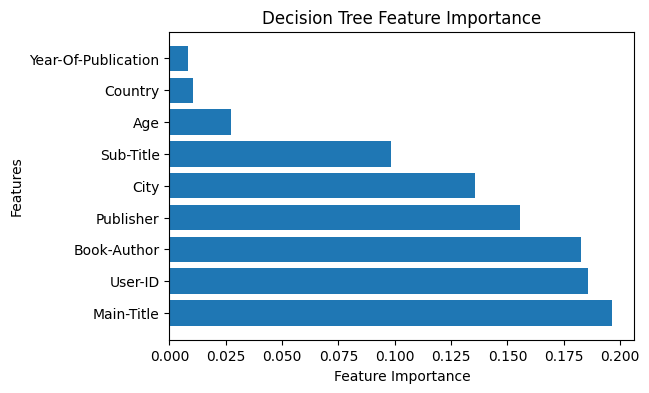

In [ ]:
# Feature Importance 확인
DT_feature_importances = DT_model.feature_importances_

# 독립 변수의 이름
feature_names = X.columns

# Feature Importance를 내림차순으로 정렬
sorted_idx = np.argsort(DT_feature_importances)[::-1]

# Feature Importance 시각화
plt.figure(figsize=(6, 4))
plt.barh(range(len(sorted_idx)), DT_feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

# 3. 랜덤 포레스트 + Optuna

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X, y, X_train, X_test, y_train, y_test = generate_data()

In [ ]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = RF_model.predict(X_test)

# 모델 평가
RF_mse = mean_squared_error(y_test, y_pred)
RF_rmse = mean_squared_error(y_test, y_pred, squared=False)
RF_r2 = r2_score(y_test, y_pred)
RF_adj_r2 = adj_r2_score(y_test, y_pred)

print("Mean Squared Error:", RF_mse)
print("Root Mean Squared Error:", RF_rmse)
print("R-squared:", RF_r2)
print("Adj-R-squared:", RF_adj_r2)

Mean Squared Error: 11.666225925188956
Root Mean Squared Error: 3.41558573676448
R-squared: 0.20438857592052773
Adj-R-squared: 0.20434035733857503


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    # 하이퍼파라미터 범위 설정
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1)

    # 랜덤 포레스트 회귀 모델 생성
    RF_2_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    RF_2_model.fit(X_train, y_train)

    # 검증 데이터로 예측
    y_pred = RF_2_model.predict(X_test)

    # RMSE를 최소화하는 것을 목표로 함
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

In [ ]:
# Optuna를 사용한 하이퍼파라미터 튜닝
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best trial:")
print("Value: ", study.best_trial.params)
print("RMSE: ", study.best_value)

# 최적의 하이퍼파라미터를 사용하여 랜덤 포레스트 모델 생성 및 학습
best_params = study.best_params
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# 모델 평가
RF_2_mse = mean_squared_error(y_test, y_pred)
RF_2_rmse = mean_squared_error(y_test, y_pred, squared=False)
RF_2_r2 = r2_score(y_test, y_pred)
RF_2_adj_r2 = adj_r2_score(y_test, y_pred)

print("Mean Squared Error:", RF_2_mse)
print("Root Mean Squared Error:", RF_2_rmse)
print("R-squared:", RF_2_r2)
print("Adj-R-squared:", RF_2_adj_r2)

[I 2023-08-10 06:35:17,320] A new study created in memory with name: no-name-aac83e9b-ad5e-4523-b12a-be46be94f7e3
[I 2023-08-10 06:37:16,571] Trial 0 finished with value: 3.817925451784934 and parameters: {'n_estimators': 195, 'max_depth': 8, 'min_samples_split': 0.28242583736157706}. Best is trial 0 with value: 3.817925451784934.
[I 2023-08-10 06:38:15,854] Trial 1 finished with value: 3.8203453353026915 and parameters: {'n_estimators': 143, 'max_depth': 4, 'min_samples_split': 0.4150724612406649}. Best is trial 0 with value: 3.817925451784934.
[I 2023-08-10 06:38:36,223] Trial 2 finished with value: 3.8231624710080787 and parameters: {'n_estimators': 71, 'max_depth': 19, 'min_samples_split': 0.6222856324094429}. Best is trial 0 with value: 3.817925451784934.
[I 2023-08-10 06:38:39,024] Trial 3 finished with value: 3.8292819440866745 and parameters: {'n_estimators': 118, 'max_depth': 3, 'min_samples_split': 0.8945159217594567}. Best is trial 0 with value: 3.817925451784934.
[I 2023-08

Best trial:
Value:  {'n_estimators': 115, 'max_depth': 14, 'min_samples_split': 0.10216699975170353}
MSE:  3.795906804464824
Mean Squared Error: 14.414100262553873
Root Mean Squared Error: 3.796590610344217
R-squared: 0.016989477980726142
Adj-R-squared: 0.016929901946519


In [ ]:
X, y, X_train, X_test, y_train, y_test = generate_data()

In [ ]:
S_kfold_list = [5, 10, 15, 20]

hyperparameters = {'n_estimators': 115, 'max_depth': 14, 'min_samples_split': 0.10216699975170353}
RF_3_model = RandomForestRegressor(**hyperparameters)

for i in S_kfold_list:
    S_kfold = StratifiedKFold(n_splits=i, shuffle=True, random_state=177)

    rmse_list = []
    n_iter =0

    for train_index, test_index in S_kfold.split(X, y):
        x_train, x_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        RF_3_model.fit(x_train, y_train)
        pred = RF_3_model.predict(x_test)
        n_iter += 1

        rmse = mean_squared_error(y_test, pred, squared=False)

        train_size = x_train.shape[0]
        test_size = x_test.shape[0]

        print('\n#{0} 교차 제곱근 오차 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
            .format(n_iter, rmse, train_size, test_size))
        print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
        rmse_list.append(rmse)

    print()
    print("="*50)
    print(f'#kfold가{i}일 때 평균 제곱근 오차:', np.mean(rmse_list))
    print("="*50)


#1 교차 제곱근 오차 : 3.8017792652360267,  학습 데이터 크기 : 660044,  검증 데이터 크기 : 165012
#1 검증 세트 인덱스 : [    17     19     21 ... 825042 825051 825052]

#2 교차 제곱근 오차 : 3.8027940958375366,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#2 검증 세트 인덱스 : [     1      3      4 ... 825024 825039 825054]

#3 교차 제곱근 오차 : 3.8003560622876993,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#3 검증 세트 인덱스 : [    20     22     31 ... 825048 825049 825053]

#4 교차 제곱근 오차 : 3.8031811770331787,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#4 검증 세트 인덱스 : [     6      7     12 ... 825043 825050 825055]

#5 교차 제곱근 오차 : 3.802996823357316,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#5 검증 세트 인덱스 : [     0      2      5 ... 825044 825045 825046]

#kfold가5일 때 평균 제곱근 오차: 3.8022214847503513

#1 교차 제곱근 오차 : 3.8032830017559673,  학습 데이터 크기 : 742550,  검증 데이터 크기 : 82506
#1 검증 세트 인덱스 : [    17     19     21 ... 825025 825026 825038]

#2 교차 제곱근 오차 : 3.800943089863839,  학습 데이터 크기 : 742550,  검증 데이터 크기 : 82506
#2 검증 세트 인덱스 : [    27     34     66 ... 825

# 4. XGBoost

In [ ]:
from xgboost import XGBRegressor
from optuna.samplers import TPESampler

sampler = TPESampler()

In [ ]:
X, y, X_train, X_test, y_train, y_test = generate_data()

In [ ]:
def objective(trial):

    # 하이퍼파라미터 범위 설정
    param = {
    'lambda': trial.suggest_float('lambda', 1e-3, 0.1),
    'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1),
    'subsample': trial.suggest_float('subsample', 0.4, 1),
    'learning_rate': trial.suggest_float('learning_rate',0.0001, 0.1),
    'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
    'max_depth': trial.suggest_int('max_depth', 2,30),
    'min_child_weight': trial.suggest_int('min_child_weight', 2, 50),
    }

    # XGBoost 회귀 모델 생성
    XGB_model = XGBRegressor(**param)
    XGB_model.fit(X_train, y_train)

    # 검증 데이터로 예측
    pred = XGB_model.predict(X_test)

    # RMSE를 최소화하는 것을 목표로 함
    rmse = mean_squared_error(y_test, pred, squared=False)

    return rmse

In [ ]:
study_xgb = optuna.create_study(
    direction='minimize',
    study_name = 'Xgboost Optuna',
    sampler=sampler
)

study_xgb.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best trial:")
print("Value: ", study_xgb.best_trial.params)
print("RMSE: ", study_xgb.best_value)

# 최적의 하이퍼파라미터를 사용하여 랜덤 포레스트 모델 생성 및 학습
best_params_xgb = study_xgb.best_params
best_model_xgb = XGBRegressor(**best_params_xgb)
best_model_xgb.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = best_model_xgb.predict(X_test)

# 모델 평가
XGB_mse = mean_squared_error(y_test, y_pred)
XGB_rmse = mean_squared_error(y_test, y_pred, squared=False)
XGB_r2 = r2_score(y_test, y_pred)
XGB_adj_r2 = adj_r2_score(y_test, y_pred)

print("Mean Squared Error:", XGB_mse)
print("Root Mean Squared Error:", XGB_rmse)
print("R-squared:", XGB_r2)
print("Adj-R-squared:", XGB_adj_r2)

[I 2023-08-10 14:09:20,790] A new study created in memory with name: Xgboost Optuna
[I 2023-08-10 14:13:31,626] Trial 0 finished with value: 3.5379534847895773 and parameters: {'lambda': 0.05579176612405577, 'alpha': 0.8097319150942736, 'colsample_bytree': 0.9370151069341109, 'subsample': 0.9510304821708928, 'learning_rate': 0.05903528277783505, 'n_estimators': 842, 'max_depth': 5, 'min_child_weight': 33}. Best is trial 0 with value: 3.5379534847895773.
[I 2023-08-10 14:15:28,612] Trial 1 finished with value: 3.5091367149197437 and parameters: {'lambda': 0.04883275455999738, 'alpha': 0.7508887694871264, 'colsample_bytree': 0.7321207871858044, 'subsample': 0.9710059801383014, 'learning_rate': 0.0878364147817376, 'n_estimators': 314, 'max_depth': 7, 'min_child_weight': 15}. Best is trial 1 with value: 3.5091367149197437.
[I 2023-08-10 14:17:14,880] Trial 2 finished with value: 3.5986487017989957 and parameters: {'lambda': 0.09946033263094942, 'alpha': 0.5645212946173868, 'colsample_bytre

Best trial:
Value:  {'lambda': 0.01893894583772941, 'alpha': 0.7353193933493986, 'colsample_bytree': 0.8061708882377794, 'subsample': 0.9137084378731792, 'learning_rate': 0.09278326974333914, 'n_estimators': 898, 'max_depth': 8, 'min_child_weight': 30}
RMSE:  3.4056941106962912
Mean Squared Error: 11.5987523756314
Root Mean Squared Error: 3.4056941106962912
R-squared: 0.20899012634441216
Adj-R-squared: 0.208942186642613


In [ ]:
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=177)

rmse_list = []
r2_list = []
n_iter =0

for train_index, test_index in S_kfold.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    best_params_xgb = study_xgb.best_params
    best_model_xgb = XGBRegressor(**best_params_xgb)
    best_model_xgb.fit(x_train, y_train)
    pred = best_model_xgb.predict(x_test)
    n_iter += 1

    XGB_rmse = mean_squared_error(y_test, pred, squared=False)
    XGB_r2 = r2_score(y_test, pred)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    print('\n#{0} RMSE : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
        .format(n_iter, rmse, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    rmse_list.append(XGB_rmse)
    r2_list.append(XGB_r2)

print()
print("="*50)
print('#kfold가5일 때 평균 RMSE:', np.mean(rmse_list))
print('\n#kfold가5일 때 평균 결정계수:', np.mean(r2_list))
print("="*50)

NameError: ignored

# 5. LGBM

# 6. CatBoost

# 7. DNN

# 외전

In [ ]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)

In [ ]:
# 1.lr / 2. dt / 3. rf / 4. xgb / 5. lgb / 6. catb

In [ ]:
models = []
scores = []
for model in [reg, ridge, lasso, Enet, DTree, rf, model_xgb, model_lgb]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

In [ ]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.22, 0.32)
plt.title('RMSLE', fontsize=15)
plt.show()